In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from collections import Counter
from google.colab import drive
import re



In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Medicine_Details.csv'
data = pd.read_csv(file_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [ ]:

data.info()

missing_values = data.isnull().sum()


statistics = data.describe()


unique_values = {col: data[col].unique() for col in data.columns}

missing_values, statistics, unique_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


(Medicine Name         0
 Composition           0
 Uses                  0
 Side_effects          0
 Image URL             0
 Manufacturer          0
 Excellent Review %    0
 Average Review %      0
 Poor Review %         0
 dtype: int64,
        Excellent Review %  Average Review %  Poor Review %
 count        11825.000000      11825.000000   11825.000000
 mean            38.516025         35.756364      25.727611
 std             25.225343         18.268134      23.991985
 min              0.000000          0.000000       0.000000
 25%             22.000000         27.000000       0.000000
 50%             34.000000         35.000000      22.000000
 75%             51.000000         47.000000      35.000000
 max            100.000000         88.000000     100.000000,
 {'Medicine Name': array(['Avastin 400mg Injection', 'Augmentin 625 Duo Tablet',
         'Azithral 500 Tablet', ..., 'Zipcoz Tablet', 'Zestasil 100 Tablet',
         'Zedruff Shampoo'], dtype=object),
  'Composition': 

Dataset has 11498 unique groups
Top 10 most frequent medicines:
Medicine Name
Lulifin Cream            4
Benadryl Syrup           3
Livoluk Oral Solution    3
Nebistar 5 Tablet        3
Amrolstar Cream          3
Lulibet Cream            3
Lulilok Cream            3
Monoguard Cream          3
Tcris Cream              3
Hexidine Mouth Wash      3
Name: count, dtype: int64


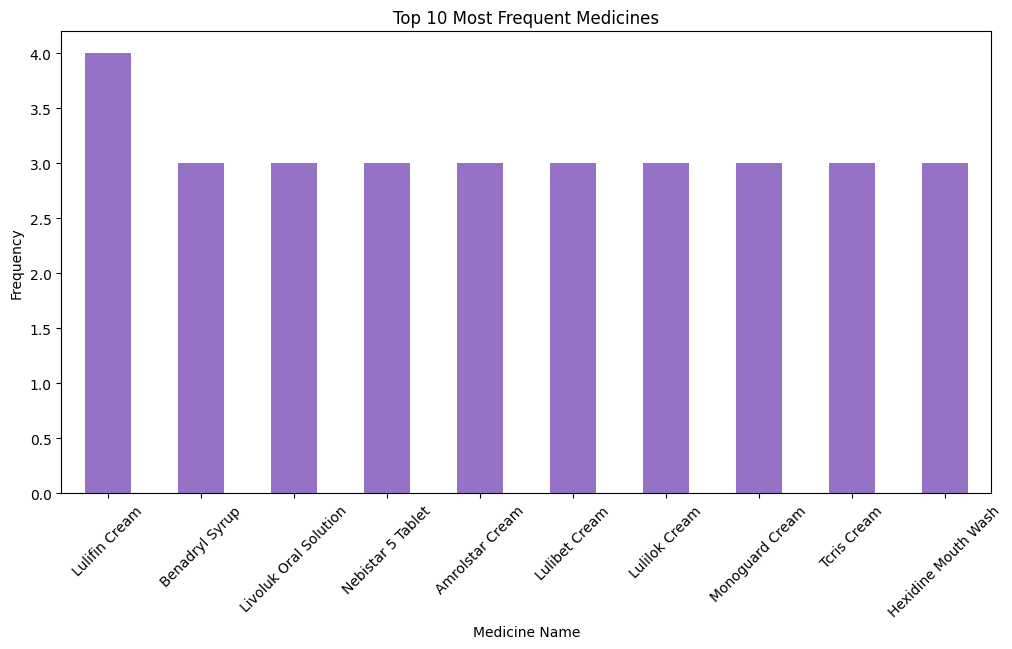

In [ ]:
# Calculate the number of unique medicine names
unique_medicines = len(data['Medicine Name'].unique())
print(f"Dataset has {unique_medicines} unique groups")

# Display the top 10 most frequent medicine names
top_10_medicines = data['Medicine Name'].value_counts().head(10)
print('Top 10 most frequent medicines:')
print(top_10_medicines)

# top 10 most frequent medicines
top_10_medicines.plot(kind='bar', figsize=(12, 6), color='#9672c7')
plt.title('Top 10 Most Frequent Medicines')
plt.xlabel('Medicine Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



Dataset has 712 unique uses
********************
And the top 10 counts are:
Uses
Treatment of Type 2 diabetes mellitus                                                          907
Treatment of Bacterial infections                                                              439
 Hypertension (high blood pressure)                                                            405
 Pain relief                                                                                   385
Treatment of Hypertension (high blood pressure)                                                279
Treatment of Fungal skin infections                                                            216
Treatment of Neuropathic pain                                                                  189
Treatment of Fungal infections                                                                 180
Treatment of Gastroesophageal reflux disease (Acid reflux)Treatment of Peptic ulcer disease    176
 Fungal skin infections     

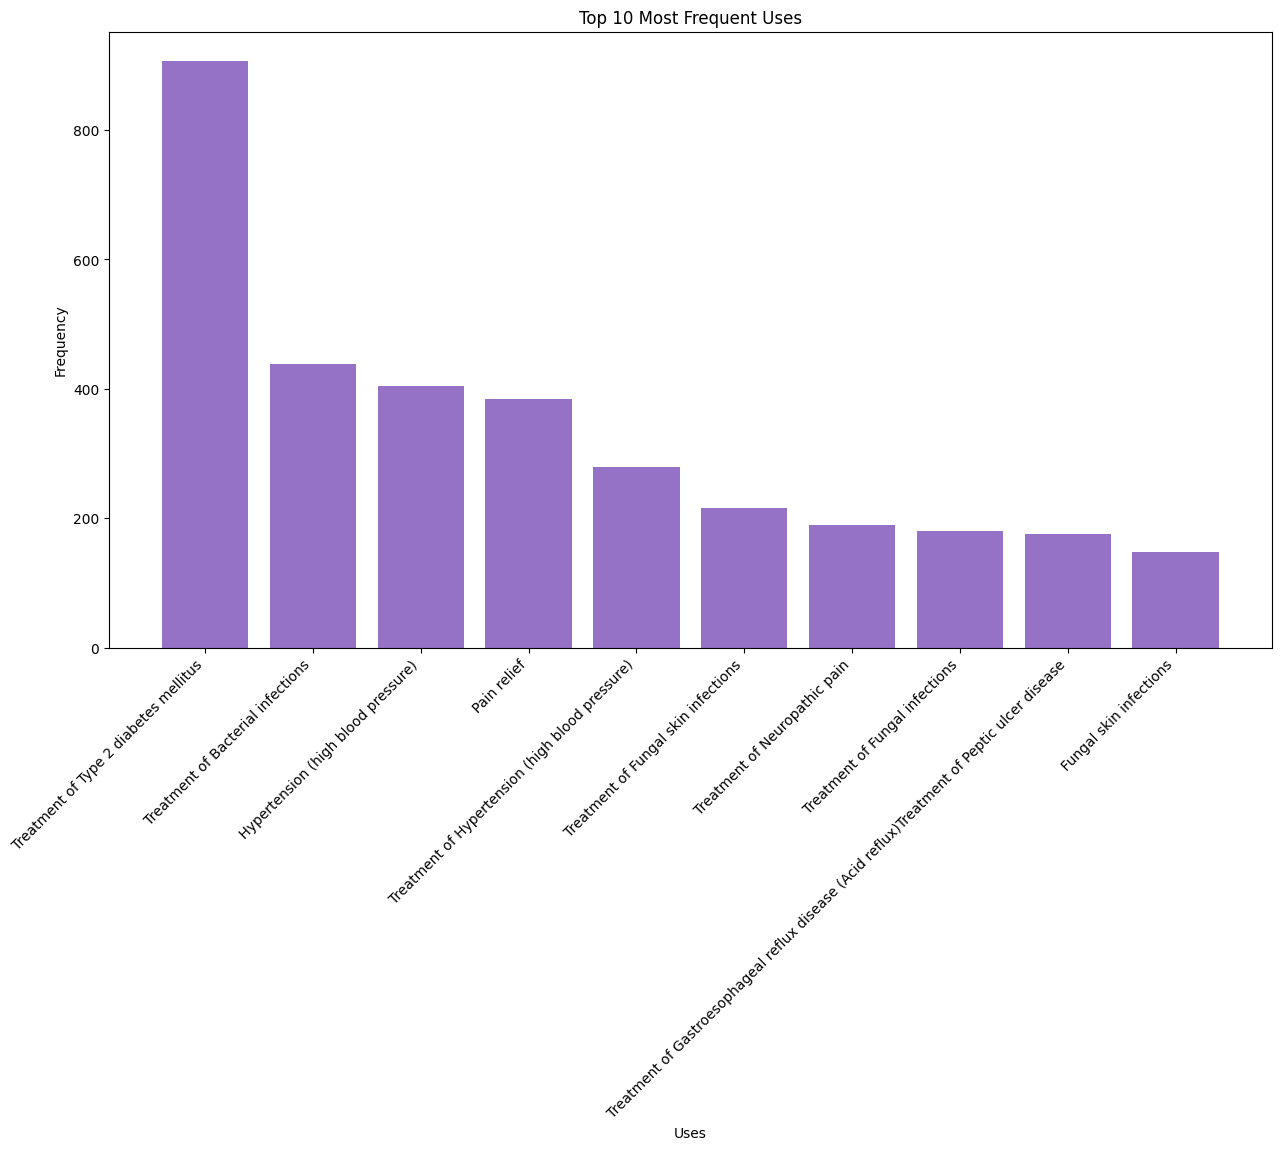

NameError: name 'textwrap' is not defined

In [ ]:


# Calculate the number of unique uses
unique_uses = len(data['Uses'].unique())
print(f"Dataset has {unique_uses} unique uses")
print('*' * 20)

# Display the top 10 most frequent uses
top_10_uses = data['Uses'].value_counts().head(10)
print('And the top 10 counts are:')
print(top_10_uses)
print('*' * 20)


fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.bar(top_10_uses.index, top_10_uses.values, width=0.8, color='#9672c7')
ax.set_title('Top 10 Most Frequent Uses')
ax.set_xlabel('Uses')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#
wrapped_labels = [textwrap.fill(label, 20) for label in top_10_uses.index]
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.bar(wrapped_labels, top_10_uses.values, width=0.8, color='#9672c7')
ax.set_title('Top 10 Most Frequent Uses')
ax.set_xlabel('Uses')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(top_10_uses.index, top_10_uses.values, width=0.8, color='#9672c7')
ax.set_title('Top 10 Most Frequent Uses')
ax.set_xlabel('Uses')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()




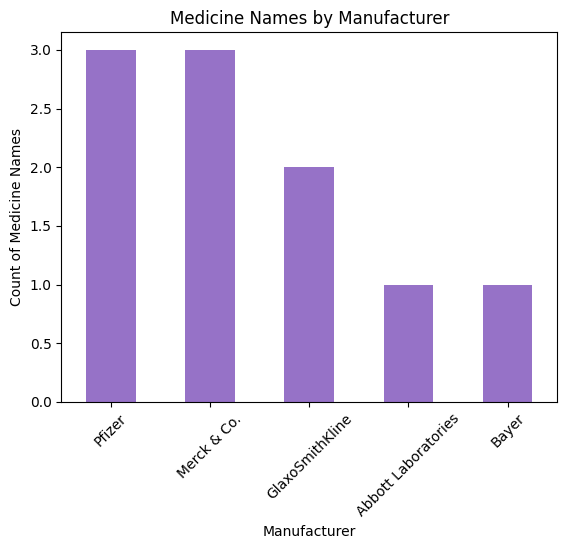

In [ ]:


# Sample data (replace with your actual data)
data = {
    'Medicine Name': ['Paracetamol', 'Ibuprofen', 'Aspirin', 'Amoxicillin', 'Penicillin', 'Paracetamol', 'Ibuprofen', 'Amoxicillin', 'Metformin', 'Lipitor'],
    'Manufacturer': ['Abbott Laboratories', 'Pfizer', 'Bayer', 'GlaxoSmithKline', 'Pfizer', 'Merck & Co.', 'Merck & Co.', 'GlaxoSmithKline', 'Merck & Co.', 'Pfizer']
}


df = pd.DataFrame(data)

# Count the occurrences of each manufacturer
manufacturer_counts = df['Manufacturer'].value_counts()

# Create a bar chart
manufacturer_counts.plot(kind='bar', stacked=False, color='#9672c7')
plt.title('Medicine Names by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count of Medicine Names')
plt.xticks(rotation=45)
plt.show()


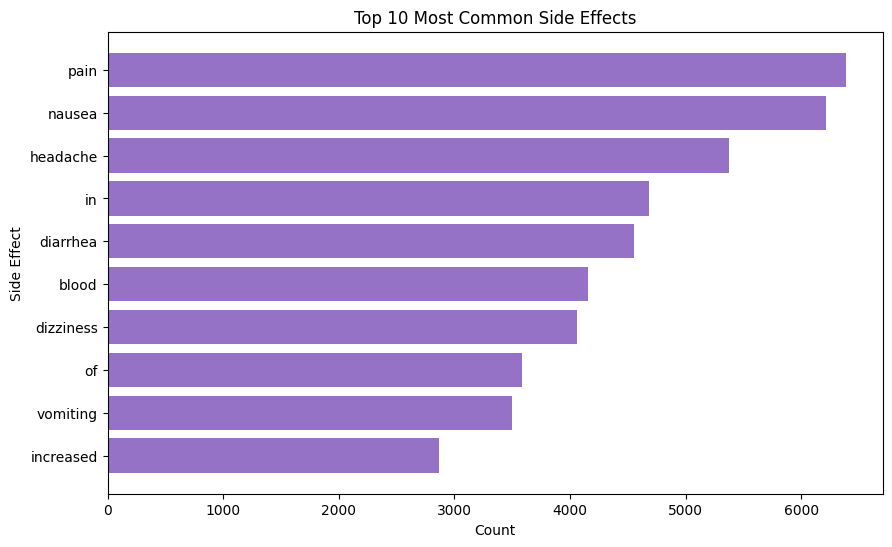

,Side_effect,Count
7,pain,6383
21,nausea,6216
4,headache,5374
14,in,4679
22,diarrhea,4553
11,blood,4156
30,dizziness,4064
17,of,3581
20,vomiting,3499
37,increased,2869


In [ ]:




side_effects_series = data['Side_effects'].dropna().apply(lambda x: re.split(r',|\s+', x.lower()))
side_effects = [effect.strip() for sublist in side_effects_series for effect in sublist if effect]

# Count the occurrences of each side effect
side_effect_counts = Counter(side_effects)

# Convert the counts to a DataFrame for easier manipulation and visualization
side_effect_data = pd.DataFrame(side_effect_counts.items(), columns=['Side_effect', 'Count'])

# Sort the DataFrame by the count in descending order
side_effect_df = side_effect_df.sort_values(by='Count', ascending=False)

# Plotting the top 10 most common side effects
plt.figure(figsize=(10, 6))
plt.barh(side_effect_df['Side_effect'].head(10), side_effect_df['Count'].head(10), color='#9672c7')
plt.xlabel('Count')
plt.ylabel('Side Effect')
plt.title('Top 10 Most Common Side Effects')
plt.gca().invert_yaxis()
plt.show()


side_effect_df.head(10)


In [ ]:
# Sample data (replace with your actual data)
data = {
    'Medicine Name': ['Paracetamol', 'Ibuprofen', 'Aspirin', 'Amoxicillin', 'Penicillin',
                       'Paracetamol', 'Ibuprofen', 'Amoxicillin', 'Metformin', 'Lipitor'],
    'Manufacturer': ['Abbott Laboratories', 'Pfizer', 'Bayer', 'GlaxoSmithKline', 'Pfizer',
                       'Merck & Co.', 'Merck & Co.', 'GlaxoSmithKline', 'Merck & Co.', 'Pfizer'],
    'Excellent Review %': [80, 75, 60, 85, 90, 70, 80, 78, 92, 85],
    'Average Review %': [15, 20, 30, 10, 5, 25, 18, 15, 7, 12],
    'Poor Review %': [5, 5, 10, 5, 5, 5, 2, 7, 1, 3]
}


df = pd.DataFrame(data)

# Distribution of medicines by manufacturers
medicine_by_manufacturer = df['Medicine Name'].groupby(df['Manufacturer']).count()
print("Distribution of medicines by manufacturers:")
print(medicine_by_manufacturer)

# Descriptive statistics for review scores by manufacturer
review_scores_by_manufacturer = df.groupby('Manufacturer')[['Excellent Review %', 'Average Review %', 'Poor Review %']].describe()
print("\nReview score statistics by manufacturer:")
print(review_scores_by_manufacturer.to_string())


Distribution of medicines by manufacturers:
Manufacturer
Abbott Laboratories    1
Bayer                  1
GlaxoSmithKline        2
Merck & Co.            3
Pfizer                 3
Name: Medicine Name, dtype: int64

Review score statistics by manufacturer:
                    Excellent Review %                                                       Average Review %                                                      Poor Review %                                                   
                                 count       mean        std   min    25%   50%    75%   max            count       mean       std   min    25%   50%    75%   max         count       mean       std   min   25%   50%   75%   max
Manufacturer                                                                                                                                                                                                                       
Abbott Laboratories                1.0  80.000000        N

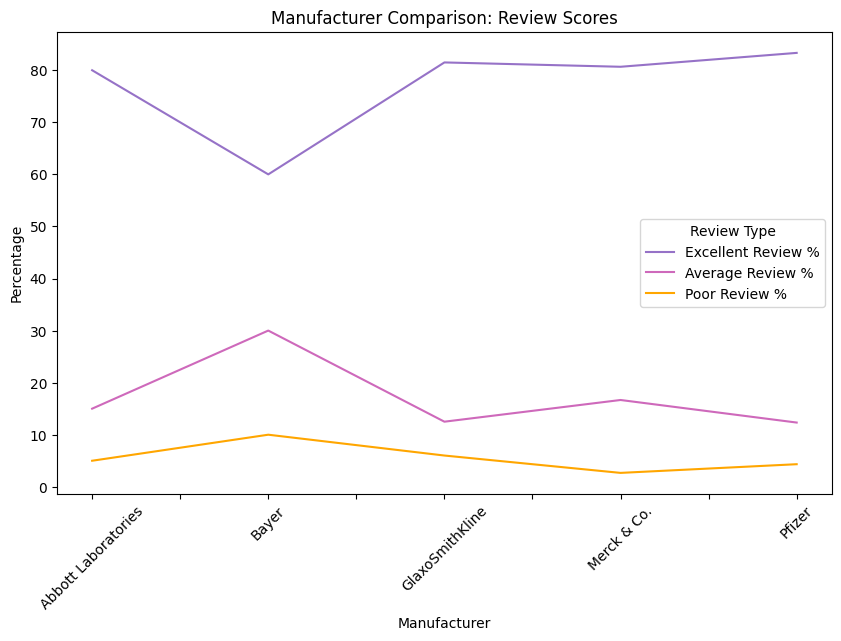

In [ ]:


# Sample data (replace with your actual data)
data = {
    'Medicine Name': ['Paracetamol', 'Ibuprofen', 'Aspirin', 'Amoxicillin', 'Penicillin',
                       'Paracetamol', 'Ibuprofen', 'Amoxicillin', 'Metformin', 'Lipitor'],
    'Manufacturer': ['Abbott Laboratories', 'Pfizer', 'Bayer', 'GlaxoSmithKline', 'Pfizer',
                       'Merck & Co.', 'Merck & Co.', 'GlaxoSmithKline', 'Merck & Co.', 'Pfizer'],
    'Excellent Review %': [80, 75, 60, 85, 90, 70, 80, 78, 92, 85],
    'Average Review %': [15, 20, 30, 10, 5, 25, 18, 15, 7, 12],
    'Poor Review %': [5, 5, 10, 5, 5, 5, 2, 7, 1, 3]
}

df = pd.DataFrame(data)

# Group data by manufacturer and calculate mean review scores
grouped_data = df.groupby('Manufacturer')[['Excellent Review %', 'Average Review %', 'Poor Review %']].mean()


grouped_data.plot(kind='line', figsize=(10, 6), color=['#9672c7','#ce69bb', '#ffa600'])
plt.title('Manufacturer Comparison: Review Scores')
plt.xlabel('Manufacturer')
plt.ylabel('Percentage')
plt.legend(title='Review Type')
plt.xticks(rotation=45)
plt.show()


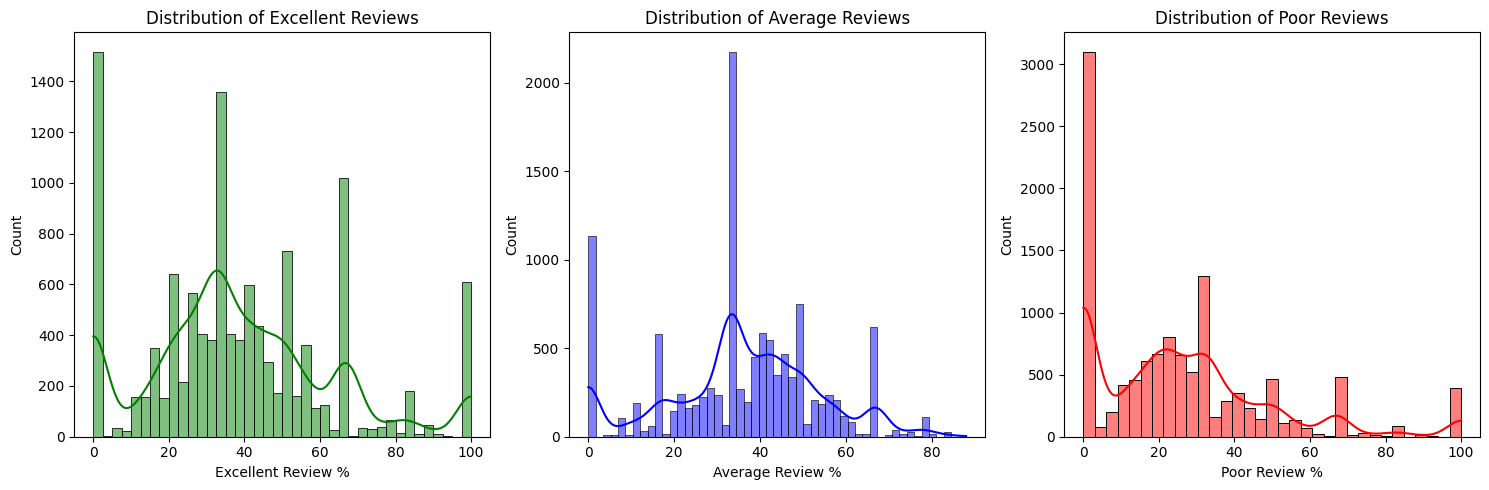

In [ ]:


# Assuming you have a DataFrame named 'df' with columns 'Excellent Review %', 'Average Review %', and 'Poor Review %'


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.histplot(data['Excellent Review %'], kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Excellent Reviews')

sns.histplot(data['Average Review %'], kde=True, color='blue', ax=axes[1])
axes[1].set_title('Distribution of Average Reviews')

sns.histplot(data['Poor Review %'], kde=True, color='red', ax=axes[2])
axes[2].set_title('Distribution of Poor Reviews')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Sample data
data = {
    'Medicine Name': ['Paracetamol', 'Ibuprofen', 'Aspirin', 'Amoxicillin', 'Penicillin',
                       'Paracetamol', 'Ibuprofen', 'Amoxicillin', 'Metformin', 'Lipitor'],
    'Manufacturer': ['Abbott Laboratories', 'Pfizer', 'Bayer', 'GlaxoSmithKline', 'Pfizer',
                       'Merck & Co.', 'Merck & Co.', 'GlaxoSmithKline', 'Merck & Co.', 'Pfizer'],
    'Composition': ['Acetaminophen', 'Ibuprofen', 'Acetylsalicylic acid', 'Amoxicillin', 'Penicillin',
                     'Acetaminophen', 'Ibuprofen', 'Amoxicillin', 'Metformin', 'Atorvastatin'],
    'Uses': ['Pain relief, fever reduction', 'Pain relief, fever reduction, inflammation', 'Pain relief, fever reduction', 'Antibiotic', 'Antibiotic',
             'Pain relief, fever reduction', 'Pain relief, fever reduction, inflammation', 'Antibiotic', 'Blood sugar control', 'High cholesterol'],
    'Excellent Review %': [80, 75, 60, 85, 90, 70, 80, 78, 92, 85],
    'Average Review %': [15, 20, 30, 10, 5, 25, 18, 15, 7, 12],
    'Poor Review %': [5, 5, 10, 5, 5, 5, 2, 7, 1, 3]
}

# Create DataFrame
df = pd.DataFrame(data)

# Descriptive statistics for review scores
print("Review Score Statistics:")
print(df[['Excellent Review %', 'Average Review %', 'Poor Review %']].describe())

# Correlation between review scores and other features
numerical_columns = ['Excellent Review %', 'Average Review %', 'Poor Review %']
correlation_matrix = df[numerical_columns].corr()
print("\nCorrelation between Review Scores:")
print(correlation_matrix)


Review Score Statistics:
       Excellent Review %  Average Review %  Poor Review %
count           10.000000         10.000000      10.000000
mean            79.500000         15.700000       4.800000
std              9.548124          7.832269       2.529822
min             60.000000          5.000000       1.000000
25%             75.750000         10.500000       3.500000
50%             80.000000         15.000000       5.000000
75%             85.000000         19.500000       5.000000
max             92.000000         30.000000      10.000000

Correlation between Review Scores:
                    Excellent Review %  Average Review %  Poor Review %
Excellent Review %            1.000000         -0.976894      -0.749786
Average Review %             -0.976894          1.000000       0.591045
Poor Review %                -0.749786          0.591045       1.000000


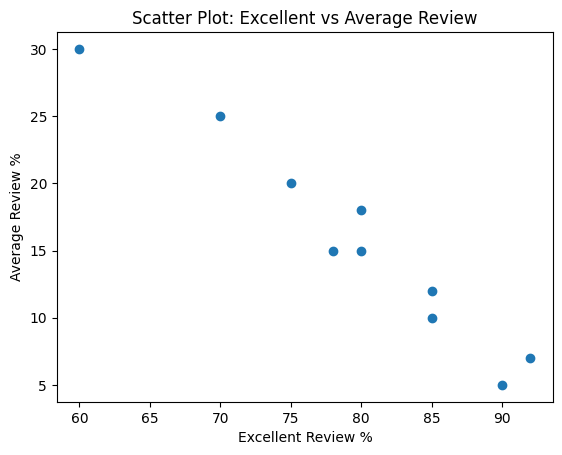

In [ ]:
plt.scatter(df['Excellent Review %'], df['Average Review %'])
plt.xlabel('Excellent Review %')
plt.ylabel('Average Review %')
plt.title('Scatter Plot: Excellent vs Average Review')
plt.show()

In [ ]:
np.random.seed(42)

data['Age'] = np.random.randint(18, 85, size=len(data))  # Ages between 18 and 85
data['Weight'] = np.random.uniform(50, 100, size=len(data))  # Weights between 50 and 100 kg
data['BloodPressure'] = np.random.randint(90, 180, size=len(data))  # Systolic blood pressure in mmHg
data['Genetic_Marker'] = np.random.randint(0, 2, size=len(data))



# Convert 'Uses' and 'Medicine' columns to categorical type if they are not already
data['Uses'] = data['Uses'].astype('category')
data['Medicine Name'] = data['Medicine Name'].astype('category')

# Encode categorical variables
data['Uses_encoded'] = data['Uses'].cat.codes
data['Medicine_encoded'] = data['Medicine Name'].cat.codes

new_dataset_path = '/content/drive/MyDrive/Colab Notebooks/Medicine_Details_With_Synthetic_Data.csv'
data.to_csv(new_dataset_path, index=False)




new_dataset_path


'/content/drive/MyDrive/Colab Notebooks/Medicine_Details_With_Synthetic_Data.csv'

In [ ]:
new_data = pd.read_csv(new_dataset_path)
new_data.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Age,Weight,BloodPressure,Genetic_Marker,Uses_encoded,Medicine_encoded
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,69,65.001524,164,0,61,1000
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,32,64.082650,138,1,435,981
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,78,80.211976,176,0,435,1068
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,38,90.837264,124,0,464,839
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,41,88.067483,136,1,517,99


In [ ]:
new_data = pd.read_csv(new_dataset_path)
missing_values = new_data.isnull().sum()
missing_values

,0
Medicine Name,0
Composition,0
Uses,0
Side_effects,0
Image URL,0
Manufacturer,0
Excellent Review %,0
Average Review %,0
Poor Review %,0
Age,0


In [ ]:
new_data = pd.read_csv(new_dataset_path)
new_data.dtypes

# Encode categorical variables if any
categorical_columns = new_data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(new_data, columns=categorical_columns, drop_first=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Medicine Name       11825 non-null  object 
 1   Composition         11825 non-null  object 
 2   Uses                11825 non-null  object 
 3   Side_effects        11825 non-null  object 
 4   Image URL           11825 non-null  object 
 5   Manufacturer        11825 non-null  object 
 6   Excellent Review %  11825 non-null  int64  
 7   Average Review %    11825 non-null  int64  
 8   Poor Review %       11825 non-null  int64  
 9   Age                 11825 non-null  int64  
 10  Weight              11825 non-null  float64
 11  BloodPressure       11825 non-null  int64  
 12  Genetic_Marker      11825 non-null  int64  
 13  Uses_encoded        11825 non-null  int64  
 14  Medicine_encoded    11825 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 1.4+

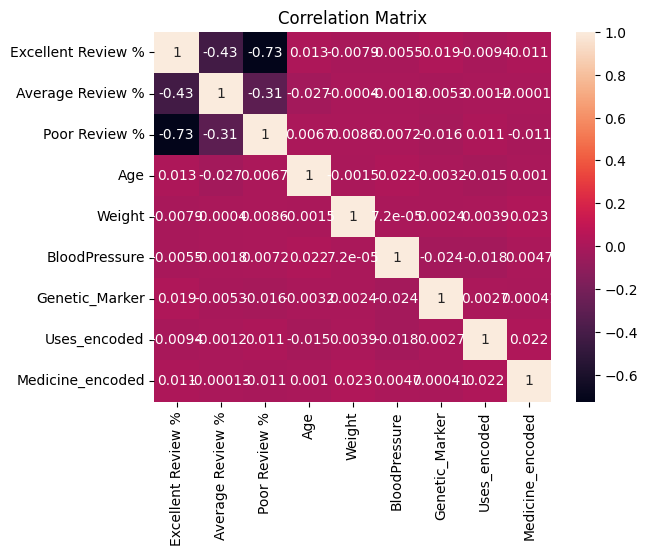

In [ ]:
new_data = pd.read_csv(new_dataset_path)
print(new_data.info())

# Drop non-numeric columns
new_data = new_data.select_dtypes(include=['number'])

# Calculate correlation matrix and visualize
correlation_matrix = new_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:

new_data = pd.read_csv(new_dataset_path)
def extract_dosage(name):
  # Improved regular expression to handle different dosage formats
  pattern = r'\d+(\.\d+)?\s*(mg|ml|units|g|mcg)'
  match = re.search(pattern, name)
  return match.group() if match else None

# Assuming you have a large dataset of medicine names in a DataFrame
new_data = pd.read_csv(file_path)

new_data['Dosage'] = new_data['Medicine Name'].apply(extract_dosage)

data.head(10)


,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Age,Weight,BloodPressure,Genetic_Marker,Uses_encoded,Medicine_encoded
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,69,65.001524,164,0,61,1000
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,32,64.082650,138,1,435,981
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,78,80.211976,176,0,435,1068
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,38,90.837264,124,0,464,839
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,41,88.067483,136,1,517,99
5,Allegra 120mg Tablet,Fexofenadine (120mg),Treatment of Sneezing and runny nose due to al...,Headache Drowsiness Dizziness Nausea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Sanofi India Ltd,35,42,23,20,63.124223,113,1,682,372
6,Avil 25 Tablet,Pheniramine (25mg),Treatment of Allergic conditionsTreatment of R...,Sedation,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Sanofi India Ltd,40,34,26,39,62.265525,172,1,409,1006
7,Aricep 5 Tablet,Donepezil (5mg),Alzheimer's disease,Common cold Urinary incontinence Rash Nausea D...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Eisai Pharmaceuticals India Pvt Ltd,43,28,29,70,98.289577,149,0,18,773
8,Amoxyclav 625 Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Abbott,36,43,21,19,50.411812,166,1,435,605
9,Atarax 25mg Tablet,Hydroxyzine (25mg),Treatment of AnxietyTreatment of Skin conditio...,Sedation Nausea Vomiting Upset stomach Constip...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Dr Reddy's Laboratories Ltd,35,41,24,47,93.986027,137,1,423,893


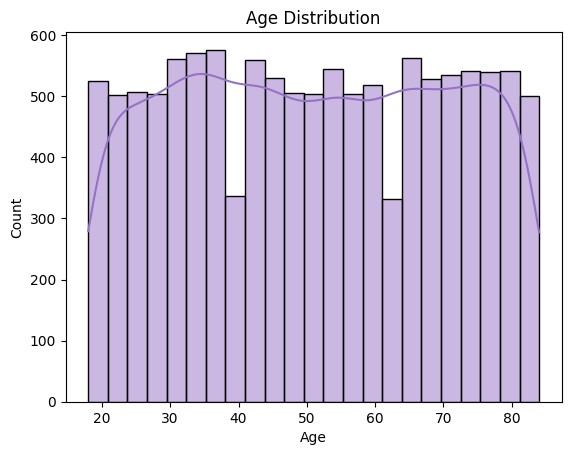

In [ ]:
new_data = pd.read_csv(new_dataset_path)
sns.histplot(new_data['Age'], color='#9672c7', kde=True)
plt.title('Age Distribution')
plt.show()

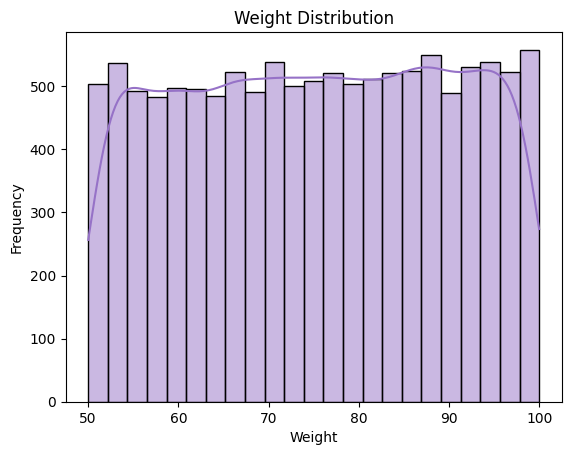

In [ ]:
new_data = pd.read_csv(new_dataset_path)
sns.histplot(new_data['Weight'],color='#9672c7', kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()